In [191]:
import covid_report_pandas as cr
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
class covid_visualization(cr.CovidReport):
    def __init__(self, file_path):
        super().__init__(file_path)
        self.data = self.load_data()

    # Bar Chart of Top 5 Countries by Confirmed Cases
    def plot_top_5_countries_by_case_count(self):
        data = super().top_5_countries_by_case_count()
        plt.bar(data['Country/Region'], data['Confirmed'], color='blue')
        plt.xlabel('Country/Region')
        plt.ylabel('Confirmed Cases')
        plt.title('Top 5 Countries by Confirmed COVID-19 Cases')
        plt.show()

    # Pie Chart of Death Distribution by Region
    def plot_summarize_cases_by_region(self):
        data = super().summarize_cases_by_region()
        plt.pie(data['Deaths'], labels=data['WHO Region'], autopct='%1.1f%%')
        plt.title('Death Distribution by Region')
        plt.show()
        
    # Line Chart comparing Confirmed and Deaths for Top 5 Countries
    def plot_line_confirmed_deaths_by_region(self):
        data = super().summarize_cases_by_region()
        plt.plot(data['WHO Region'], data['Confirmed'], marker='o', color='blue')
        plt.plot(data['WHO Region'], data['Deaths'], marker='o', color='red')
        plt.xticks(rotation=45)
        plt.xlabel('WHO Region')
        plt.grid()
        plt.ylabel('Cases')
        plt.yscale('log')
        plt.title('Confirmed and Death Cases by Region')
        plt.legend(['Confirmed', 'Deaths'])
        plt.show()

    # Scatter Plot of Confirmed Cases vs Recovered Cases 
    def scatter_plot_compare_recovery_rates(self):
        data = super().summarize_cases_by_region()
        plt.scatter(data['Confirmed'], data['Recovered'], color='blue', label='Cases')
        plt.plot([0, data['Confirmed'].max()], [0, data['Confirmed'].max()], 'r--', label='100% Recovery Line', alpha=0.5)
        plt.xticks(rotation=45)
        plt.xlabel('Confirmed Cases')
        plt.ylabel('Recovered Cases')
        plt.title('Confirmed Cases vs Recovered Cases by Region')
        plt.legend()
        plt.grid(True)
        plt.show()

    #Histogram of Death Counts across all Regions
    def hist_summarize_death_by_region(self):
        data = super().summarize_cases_by_region()
        plt.hist(data['Deaths'], bins=5, color='grey')
        plt.xlabel('Number of Deaths')
        plt.ylabel('Frequency')
        plt.title('Distribution of Deaths by Region')
        plt.tight_layout()
        plt.show()


    # Stacked Bar Chart of Confirmed, Deaths, and Recovered Cases for Top 5 Countries
    def stackedbar_confirmed_deaths_recovered_by_5_countries(self):
        data = self.data.head(5).set_index('Country/Region')[['Confirmed', 'Deaths', 'Recovered']]
        data.plot(kind='bar', stacked=True, color=['blue', 'red', 'green'])
        plt.xlabel('Country/Region')    
        plt.ylabel('Number of Cases')
        plt.title('Stacked Bar of Confirmed, Deaths, and Recovered Cases for Top 5 Countries')
        plt.tight_layout()
        plt.show()
        
    # Box Plot of Confirmed Cases by Region
    def box_plot_confirmed_by_region(self):
        data = super().summarize_cases_by_region()
        data.boxplot(column = 'Confirmed', by='WHO Region')
        plt.xlabel('WHO Region')
        plt.xticks(rotation=45)
        plt.ylabel('Number of Confirmed Cases')
        plt.title('Box Plot of Confirmed Cases by Region')
        plt.show()

    #Trend Line: Plot Confirmed cases for India vs another chosen country (side by side comparison).
    def subplot_india_vs_another_country(self, country):
        india_data = self.data[self.data['Country/Region'] == 'India']
        country_data = self.data[self.data['Country/Region'] == country]
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        fig.set_facecolor('lightgrey')

        india_data[['Confirmed','Deaths','Recovered','Active']].plot(
                       color=['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'], 
                       marker='o', linestyle='-', linewidth=2, ax=ax1)
        ax1.set_title('COVID-19 Trend in India')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Cases')
        ax1.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])
        ax1.grid(True)

        country_data[['Confirmed','Deaths','Recovered','Active']].plot(
                         color=['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'], 
                         marker='o', linestyle='-', linewidth=2, ax=ax2)
        ax2.set_title(f'COVID-19 Trend in {country}')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Cases')
        ax2.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])
        ax2.grid(True)
        plt.tight_layout()
        plt.show()
    

In [193]:
if __name__ == "__main__":
    file_path = 'c:/Users/2276038/Desktop/Learning/python/assignments/Assignment_week5/country_wise_latest.csv'
    report = covid_visualization(file_path)
    

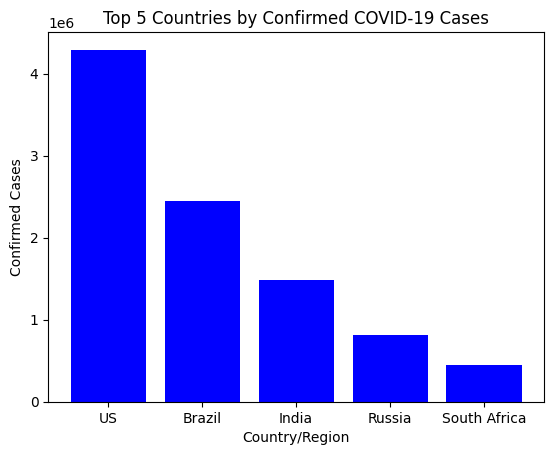

In [194]:
report.plot_top_5_countries_by_case_count()

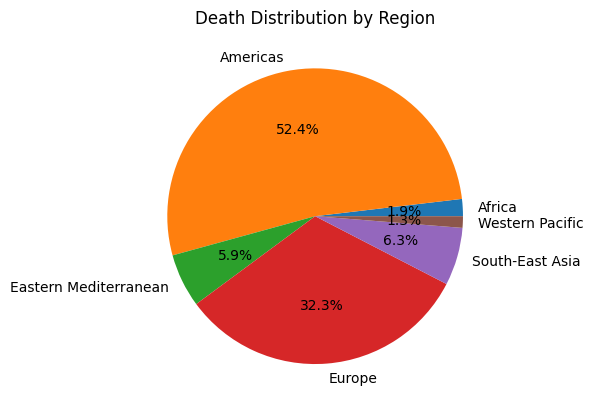

In [195]:
report.plot_summarize_cases_by_region()

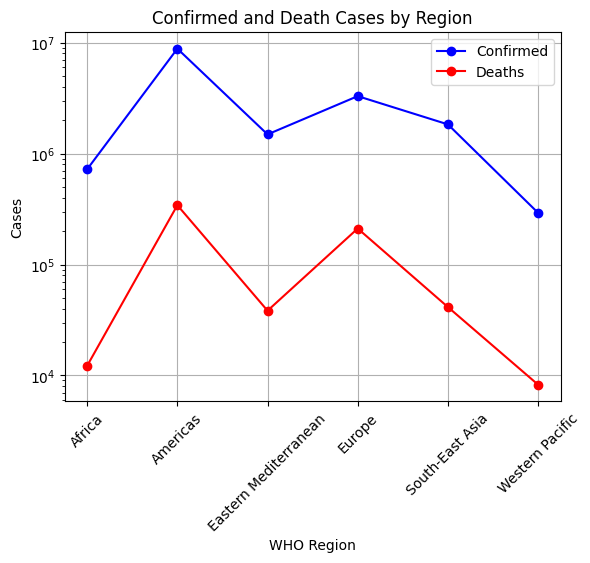

In [196]:
report.plot_line_confirmed_deaths_by_region()

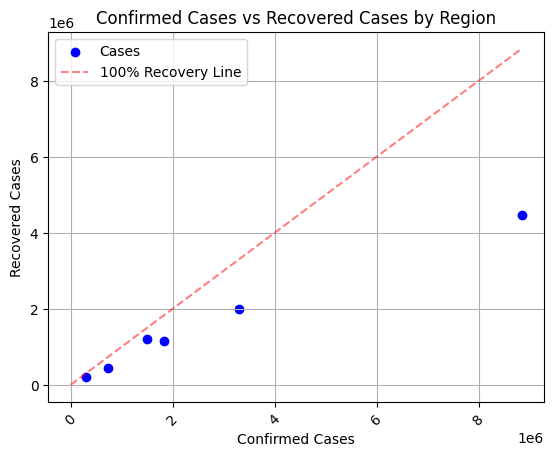

In [197]:
report.scatter_plot_compare_recovery_rates()

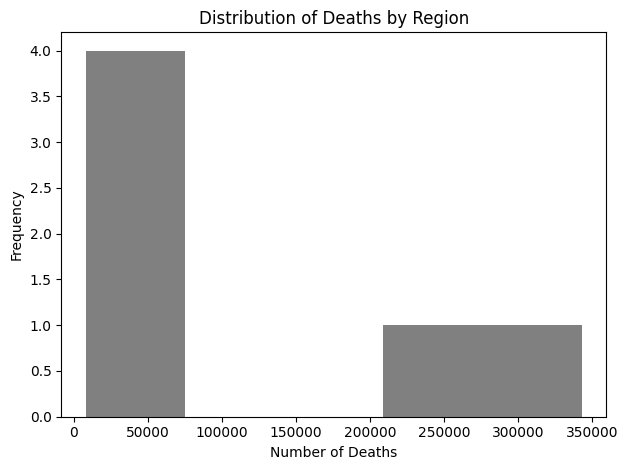

In [198]:
report.hist_summarize_death_by_region()

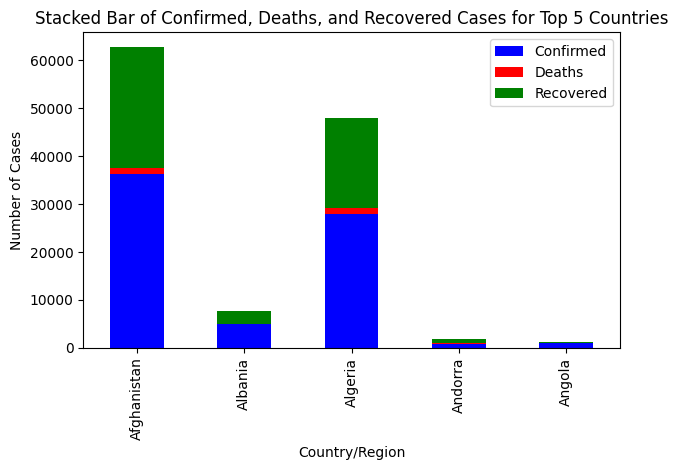

In [199]:
report.stackedbar_confirmed_deaths_recovered_by_5_countries()

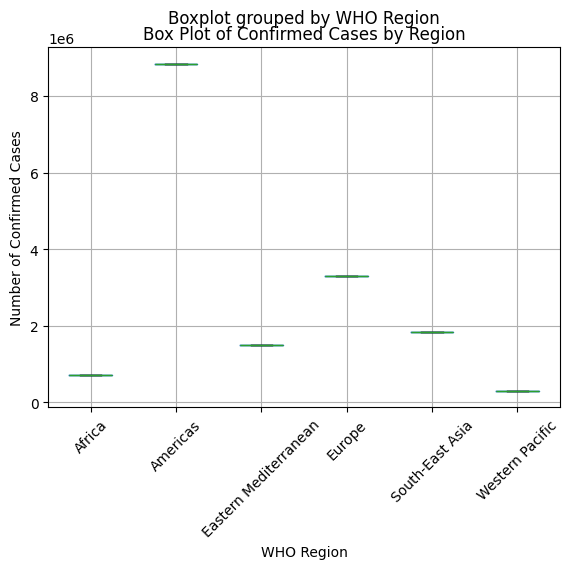

In [200]:
report.box_plot_confirmed_by_region()

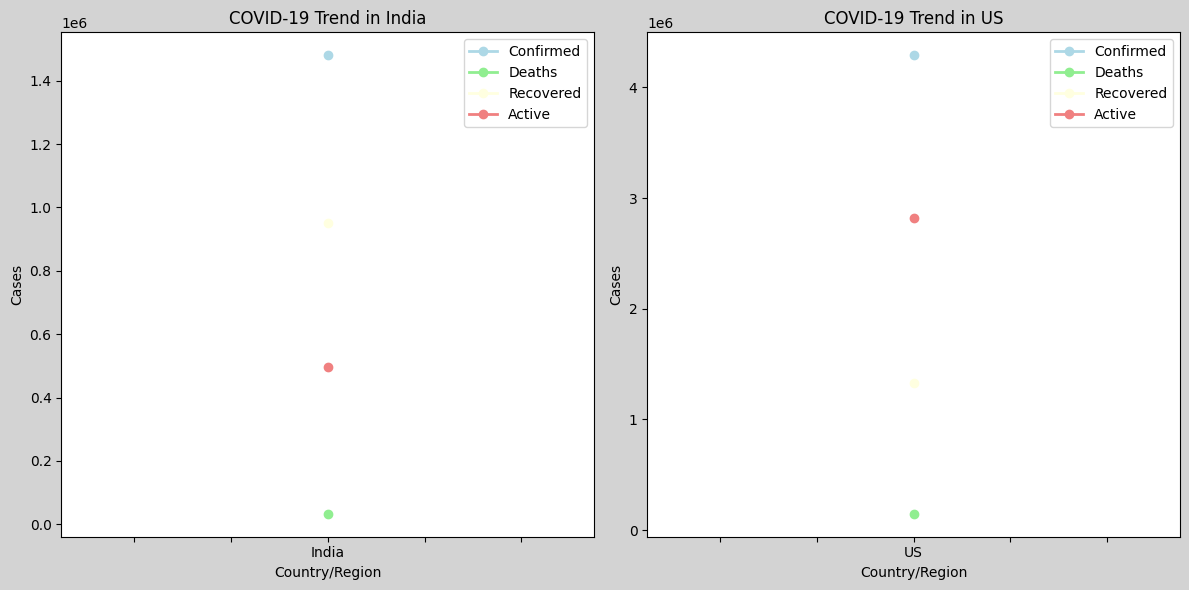

In [201]:
report.subplot_india_vs_another_country('US')